<a href="https://colab.research.google.com/github/aishwarya-dangat/aishwarya-dangat/blob/main/ECG_HRV_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install neurokit2
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt

print("Let's start the first analysis!")

Let's start the first analysis!


60000


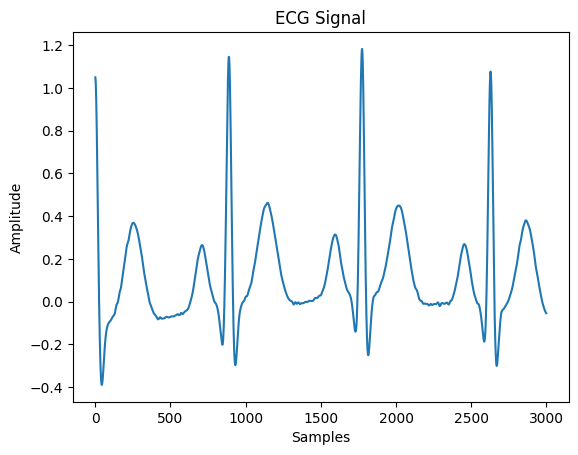

In [ ]:
ecg_signal = nk.ecg_simulate(duration=60, sampling_rate=1000, heart_rate=70)
print(len(ecg_signal))

plt.plot(ecg_signal[:3000])
#[:3000- slicing| shows that i request the sample from starting point upto 3000, which is 3sec of 60 sec signal]
plt.title("ECG Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
signal, info= nk.ecg_process(ecg_signal, sampling_rate=1000)
print(info["ECG_R_Peaks"])

# (signal, info) nk.ecg_process : this function gives two outputs at the same time (unpacking) it cleans the signal, finds the R peaks, and returns two things:
#signals — a table of the cleaned signal and markers at each peak
#info — a dictionary containing things like the exact sample numbers where R peaks were found

[  888  1773  2629  3467  4317  5178  6026  6856  7698  8572  9458 10325
 11175 12034 12902 13755 14590 15428 16286 17153 18012 18868 19732 20603
 21463 22313 23167 24027 24882 25730 26582 27444 28303 29154 30007 30871
 31737 32594 33447 34307 35171 36027 36876 37730 38592 39448 40296 41149
 42013 42876 43725 44575 45442 46316 47174 48019 48873 49742 50604 51440
 52277 53131 54003 54869 55720 56576 57454 58333 59189]


In [ ]:
#what do I se: first R peak is at 888 and my data was at sampling rate of 1000Hz (meaning 1000 samples per second).
# so 888 divided by 1000 = 0.888 sec. so first peak is under 1 sec.

# now I need to find HRV which is basically difference between R-R peaks. so 1773-888 = 885ms
# i can use numpy to calculate the difference.

rr_intervals = np.diff(info["ECG_R_Peaks"])
print(rr_intervals[:10])

[885 856 838 850 861 848 830 842 874 886]


In [ ]:
#HRV analysis there are **standard metrics** researchers use to quantify this variability. The most common ones are:

# **SDNN** — standard deviation of all R-R intervals (overall variability)
# **RMSSD** — root mean square of successive differences (short term variability)
# I can use np.diff and np.std

sdnn = np.std(rr_intervals)
rmss = np.sqrt(np.mean(np.diff(rr_intervals)**2))

# use sqaure root to balance the calculations and get results that makes sense
# np.diff(rr_intervals) — differences between consecutive R-R intervals
# **2 — square each difference
# np.mean() — average them
# np.sqrt() — square root of that average
# It's measuring how much each beat-to-beat interval changes from the previous one. Very sensitive to short term variability.

print("SDNN:", sdnn)
print("RMSS:", rmss)

SDNN: 11.213049660951384
RMSS: 12.490593475617334


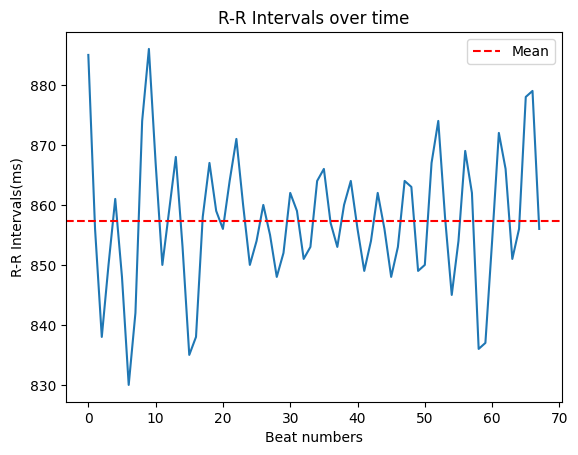

In [ ]:
plt.plot(rr_intervals)
plt.title("R-R Intervals over time")
plt.xlabel("Beat numbers")
plt.ylabel("R-R Intervals(ms)")
plt.axhline(y=np.mean(rr_intervals), color='r', linestyle ='--', label='Mean')
plt.legend()
plt.show()